# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# softmax regression

In [35]:
ar = pd.read_csv('../wk4/audit_risk.csv')
tr = pd.read_csv('../wk4/trial.csv')
print(ar.shape)
print(tr.shape)

(776, 27)
(776, 18)


In [36]:
print(list(ar))
print(list(tr))

['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk']
['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk']


In [37]:
# comapre column names 
ar_cols = ar.columns
tr_cols = tr.columns

common_cols = ar_cols.intersection(tr_cols)
ar_not_tr = ar_cols.difference(tr_cols)
tr_not_ar = tr_cols.difference(ar_cols)
print(ar_not_tr )

Index(['Audit_Risk', 'CONTROL_RISK', 'Detection_Risk', 'District_Loss',
       'Inherent_Risk', 'PROB', 'Prob', 'RiSk_E', 'Risk_A', 'Risk_B', 'Risk_C',
       'Risk_D', 'Risk_F', 'Score_A', 'Score_B', 'Score_B.1', 'Score_MV'],
      dtype='object')


In [38]:
# modify common column names to compare their row values
# Risk has different values in ar and tr, rest of the common columns have the same values
ar.rename(columns={'Risk':'aRisk'}, inplace=True)

ar_cols = ar.columns
tr_cols = tr.columns
tr_not_ar = tr_cols.difference(ar_cols)

df = pd.concat([ar,tr[tr_not_ar]], axis=1)
df.shape

(776, 36)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 36 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [40]:
df.isnull().values.sum()

1

In [41]:
# Money_value and aMoney_value have Nan
df[df.isnull().any(1)]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,aRisk,District,History_score,LOSS_SCORE,Loss,MONEY_Marks,Marks,Risk,SCORE_A,SCORE_B
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0,2,2,2,0,2,2,0,2,2


In [42]:
# fill NAN with mean
colname = list(df)

x = colname[12] # 'aMoney_Value'

print(df.loc[:,x].sum())

df[x] = df[x].fillna(df[x].mean())

print(df.loc[:,x].sum())


10956.663999999999
10970.80163096774


In [43]:
# select columns based on their types
flo_vars = list(df.select_dtypes(include=[np.float64]))
int_vars = list(df.select_dtypes(include=[np.int64]))

print(flo_vars)
print(int_vars)

['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'PROB', 'RiSk_E', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk']
['District_Loss', 'History', 'aRisk', 'District', 'History_score', 'LOSS_SCORE', 'Loss', 'MONEY_Marks', 'Marks', 'Risk', 'SCORE_A', 'SCORE_B']


In [44]:
# select columns with less than 4 unique values :'Score_A', 'Score_B', 'Score_B.1', 'Score_MV', 'PROB', 'Prob', 'Detection_Risk'
less4 =[]
for flo in flo_vars:
    a = len(np.unique(df[flo]))
    if a < 4:
        print(flo,', unique values:', a)
        less4.append(flo)
print(less4)
        

Score_A , unique values: 3
Score_B , unique values: 3
Score_B.1 , unique values: 3
Score_MV , unique values: 3
PROB , unique values: 3
Prob , unique values: 3
Detection_Risk , unique values: 1
['Score_A', 'Score_B', 'Score_B.1', 'Score_MV', 'PROB', 'Prob', 'Detection_Risk']


In [45]:
# drop "Detection_Risk"
df = df.drop(['Detection_Risk'], axis=1)

In [46]:
# reorganize column types
dfnames = list(df)

new_flo= list(set(flo_vars)-set(less4))
new_int = list(set(dfnames) -set(new_flo))
print(len(new_flo),len(new_int))


16 19


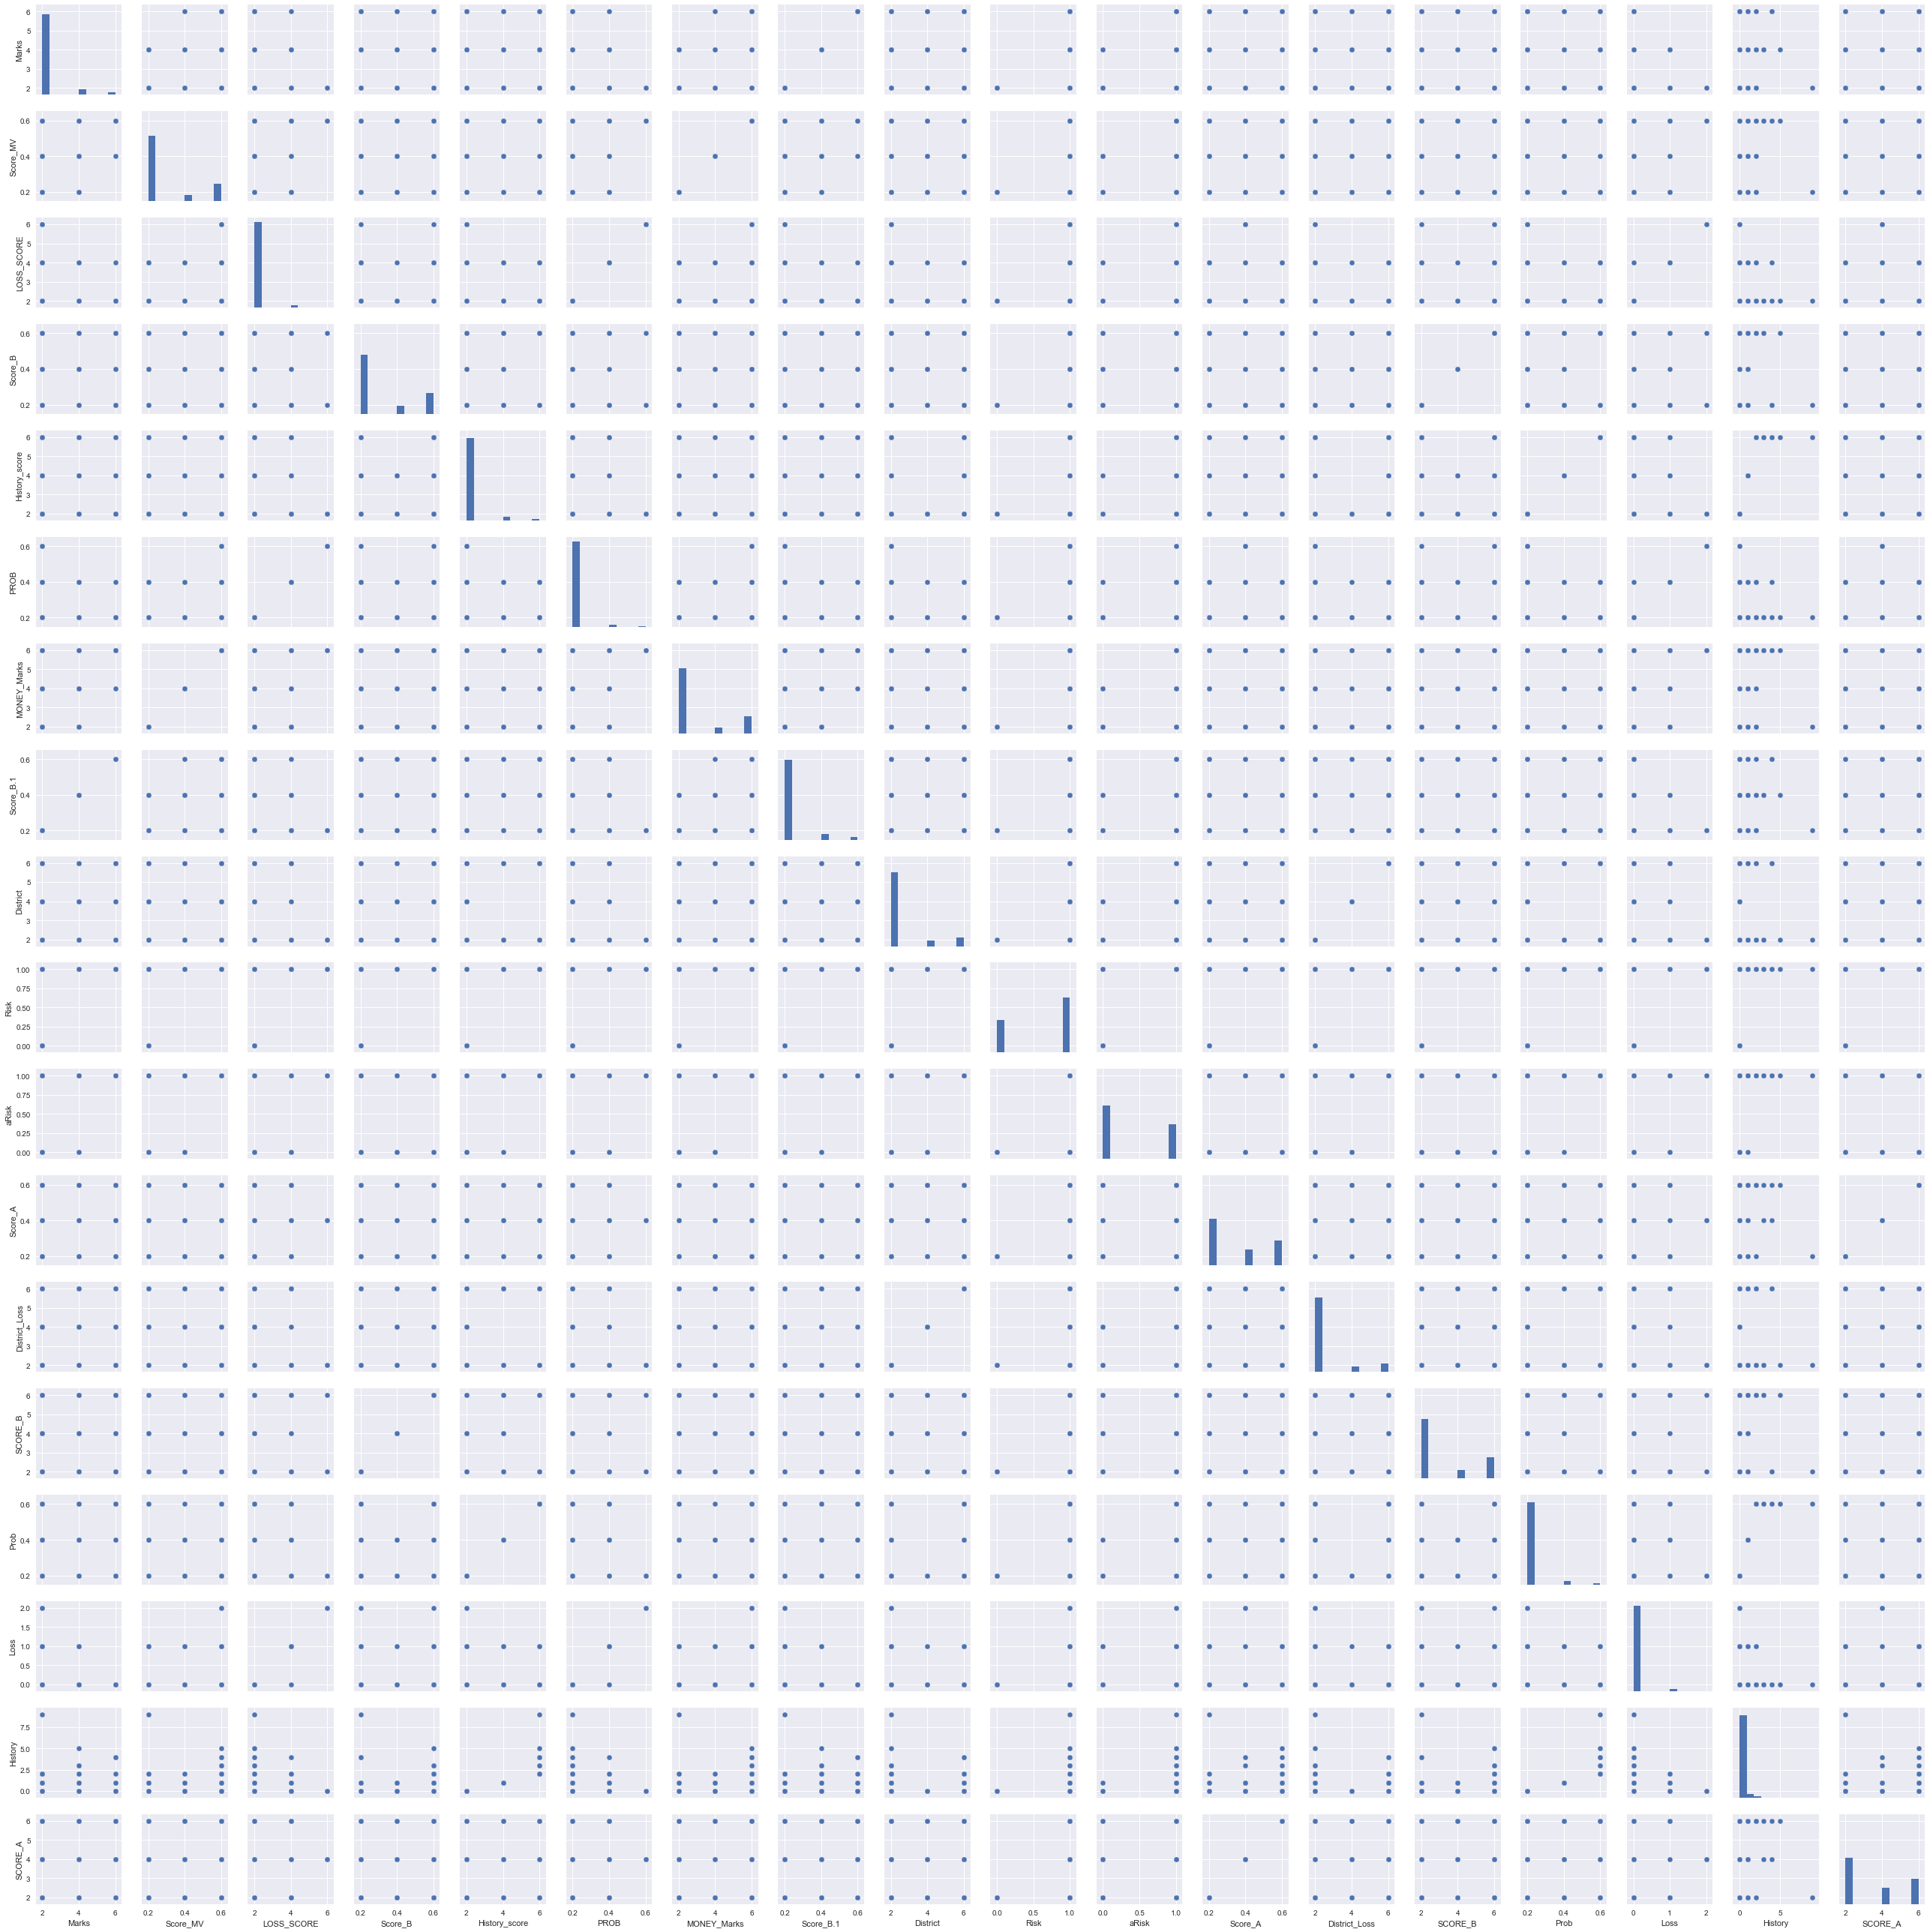

In [47]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
import seaborn as sns
sns.set()

sns.pairplot(df[new_int],size = 2 ,kind ='scatter')
plt.show()

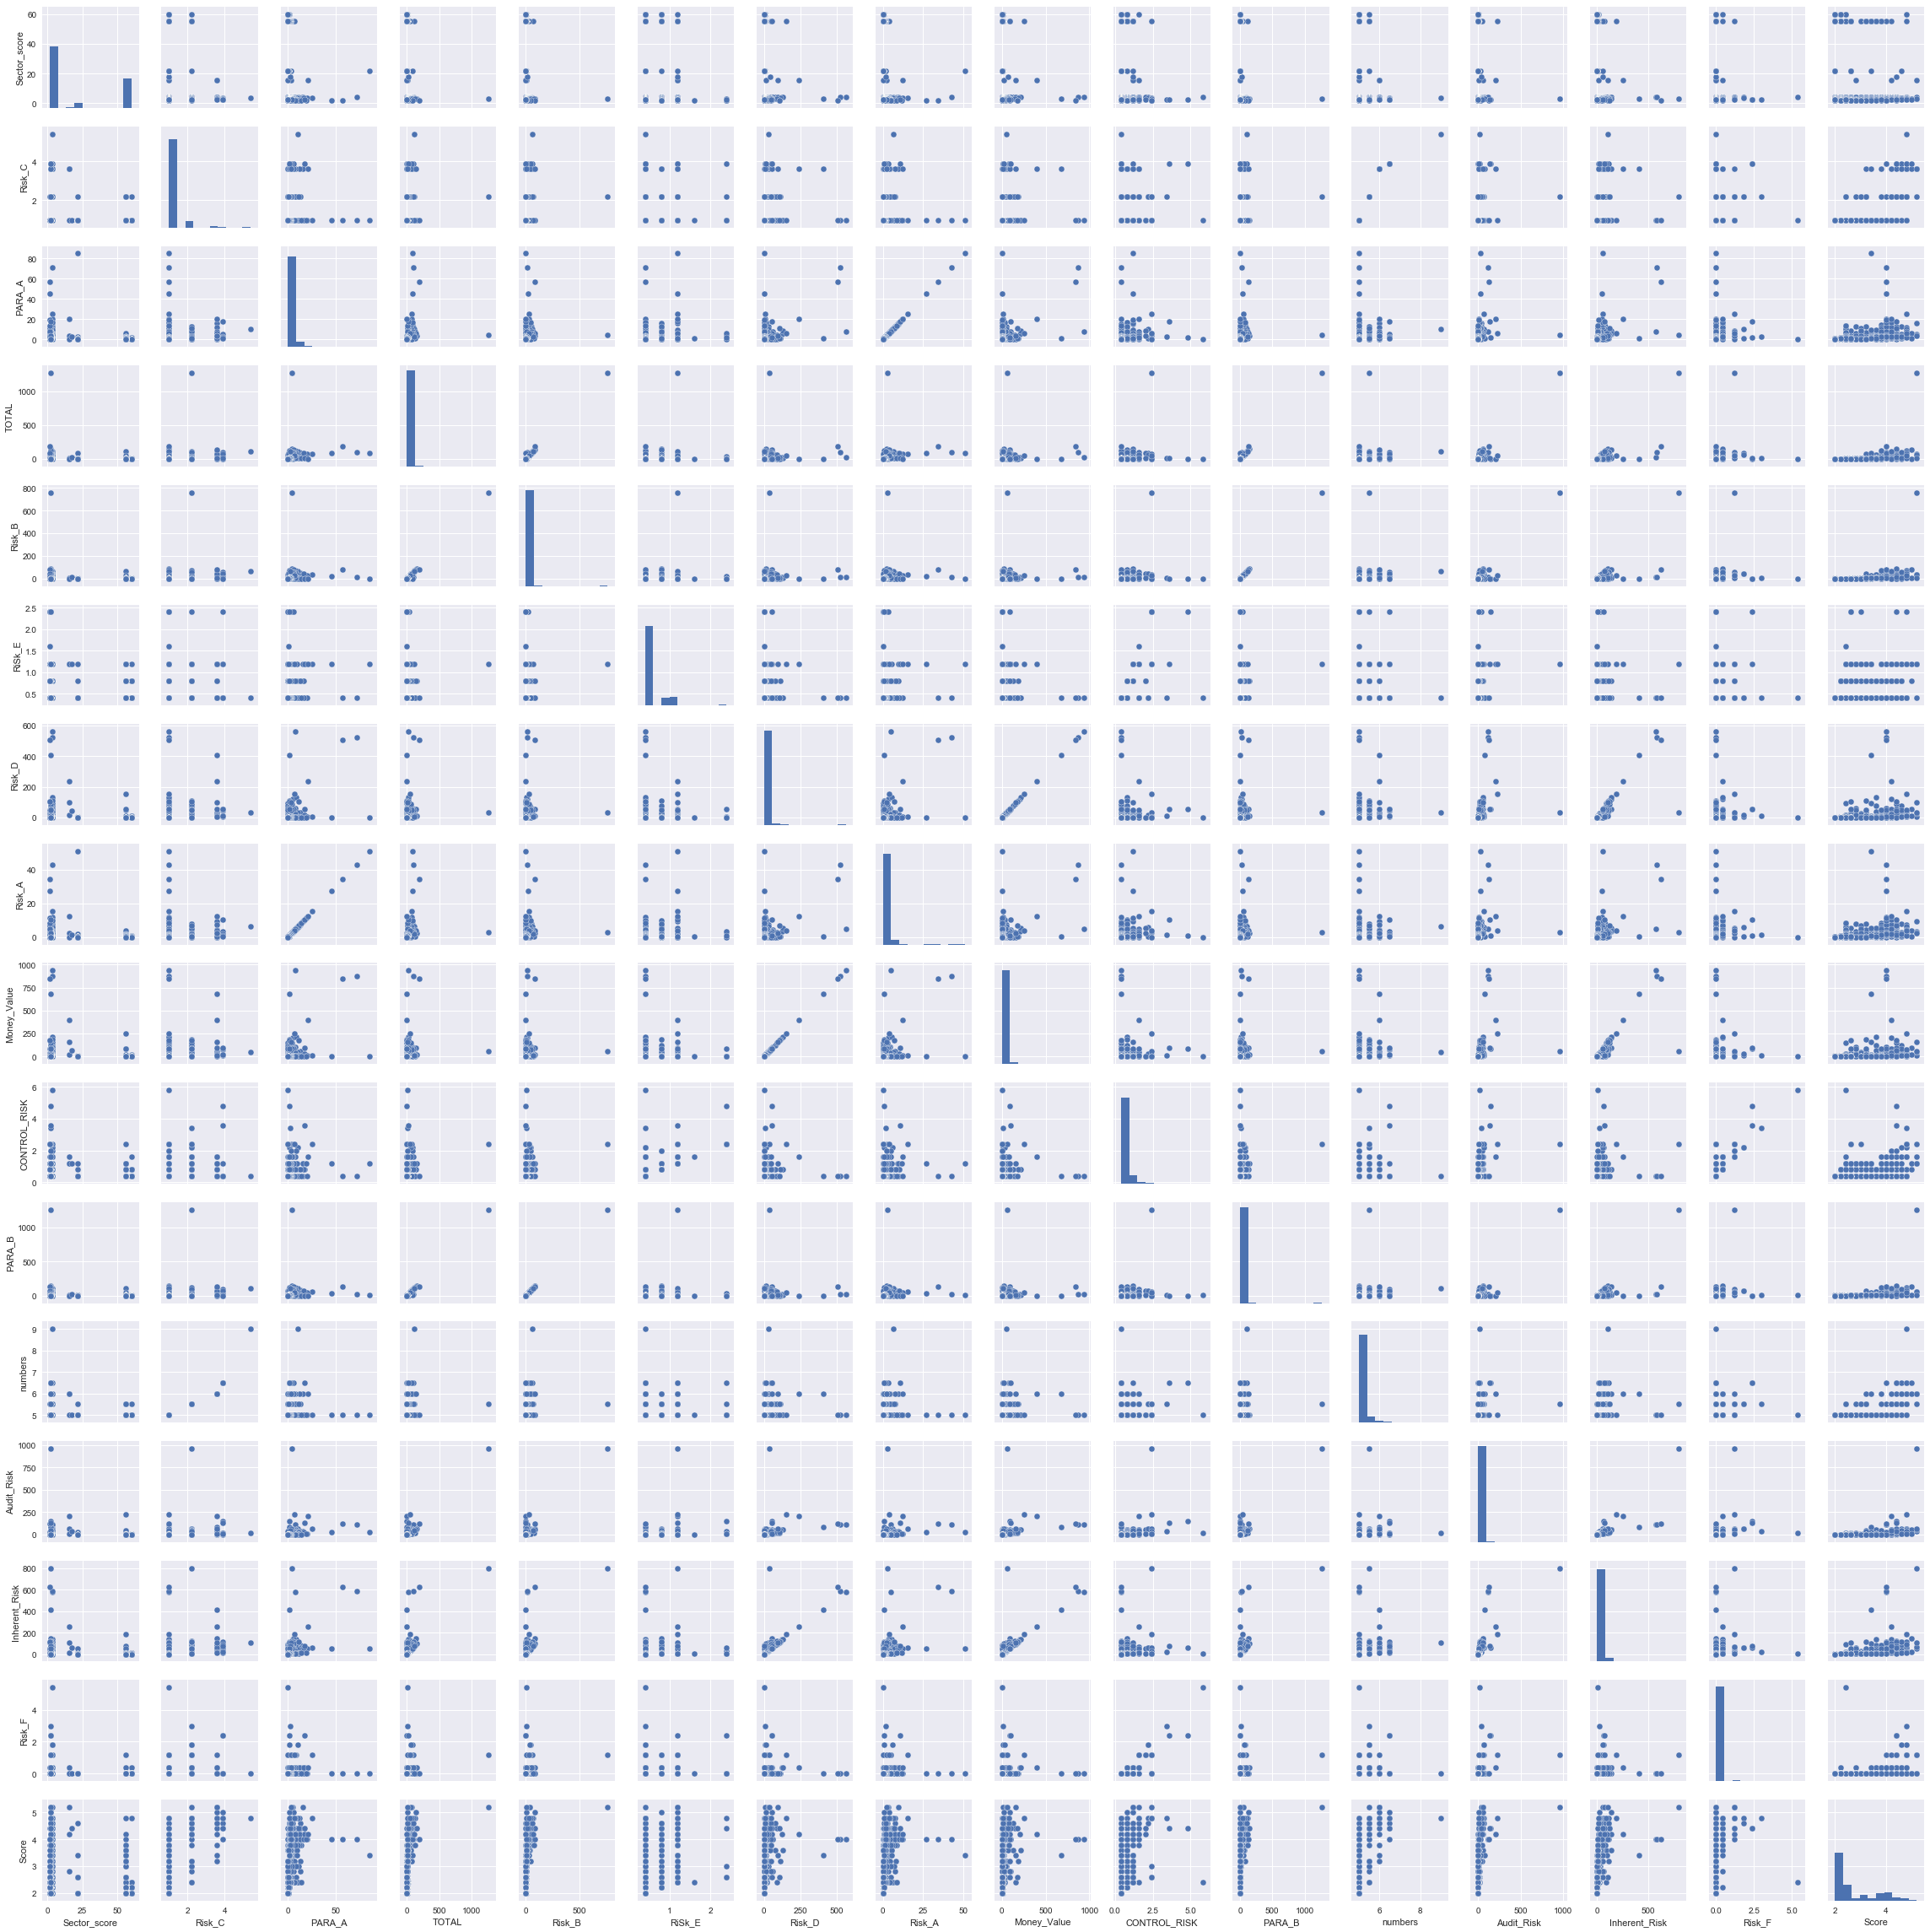

In [48]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
import seaborn as sns
sns.set()

sns.pairplot(df[new_flo],size = 2 ,kind ='scatter')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BD2ED90B8>,
      dtype=object)

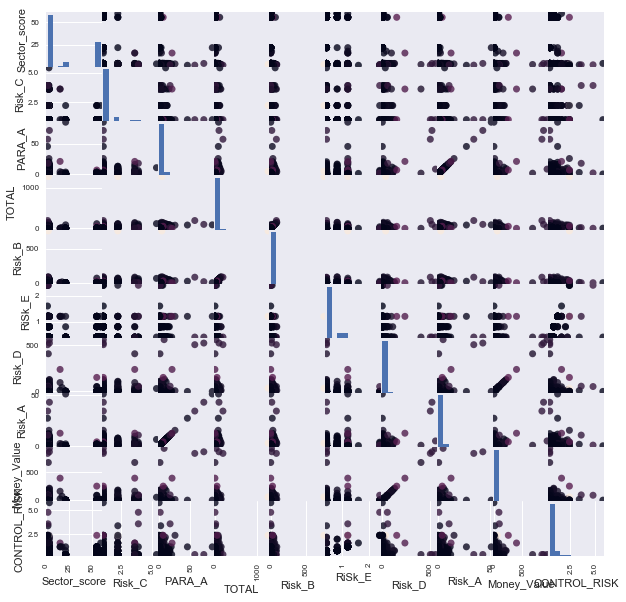

In [49]:
%matplotlib inline

from pandas.plotting import scatter_matrix

scatter_matrix(df[new_flo[0:10]], figsize = (10,10), c = df['Audit_Risk'] , alpha = 0.8, marker = 'O')

C:\Users\clfee\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\clfee\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\clfee\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

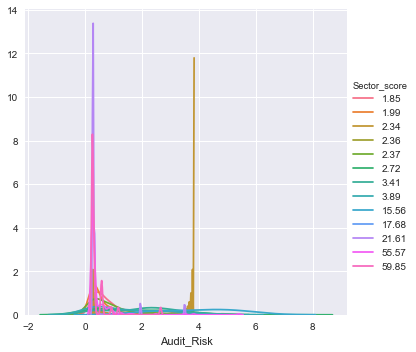

<Figure size 432x288 with 0 Axes>

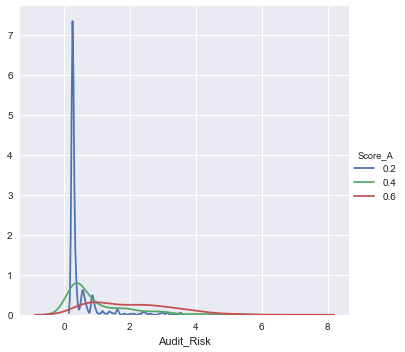

<Figure size 432x288 with 0 Axes>

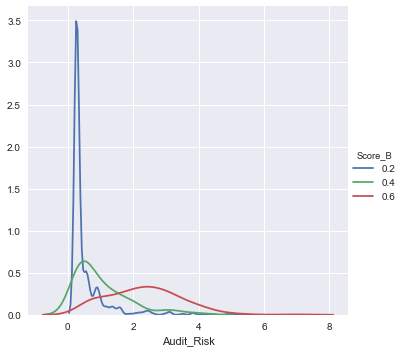

<Figure size 432x288 with 0 Axes>

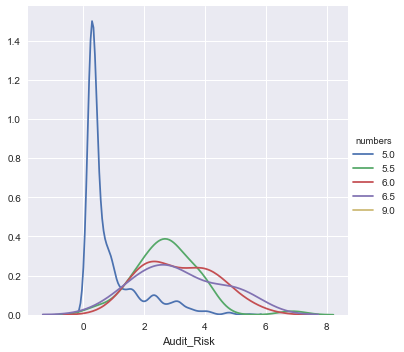

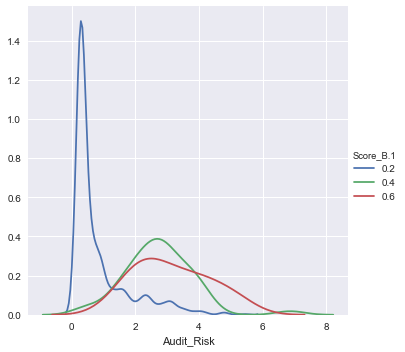

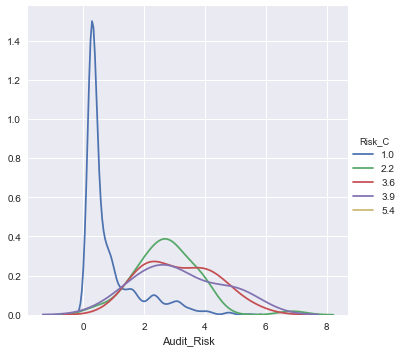

<Figure size 432x288 with 0 Axes>

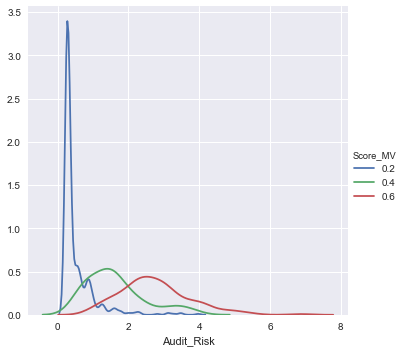

<Figure size 432x288 with 0 Axes>

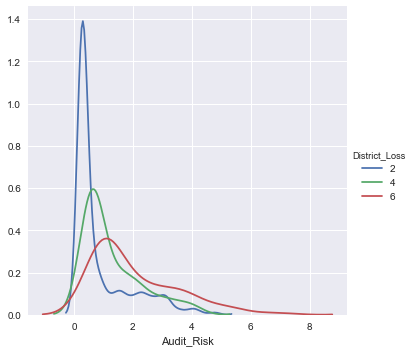

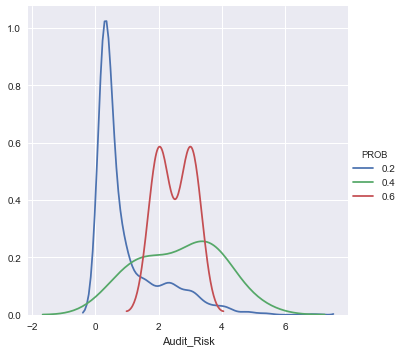

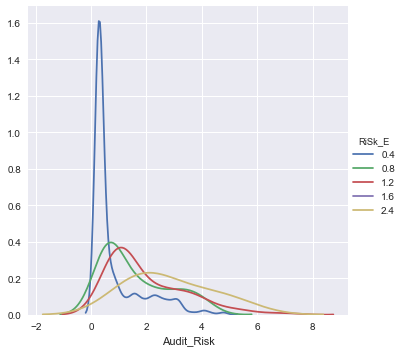

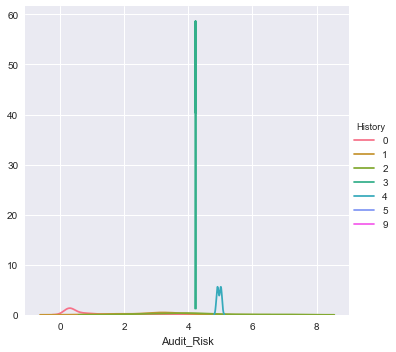

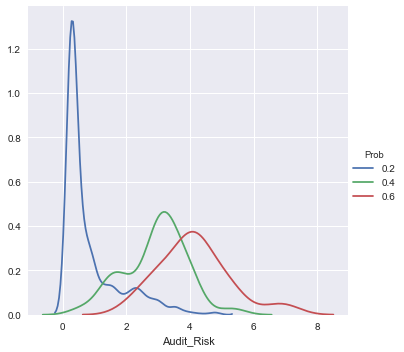

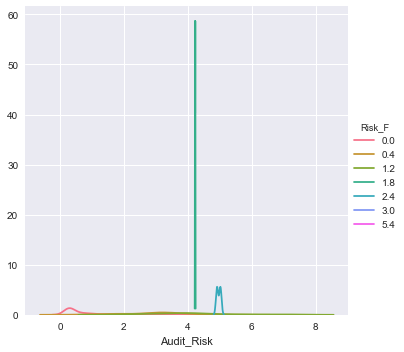

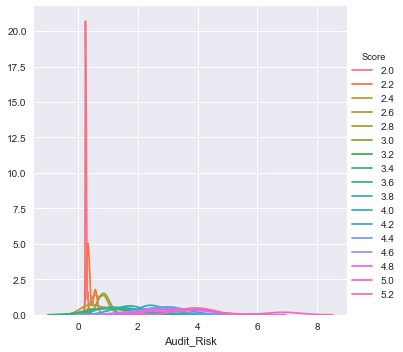

<Figure size 432x288 with 0 Axes>

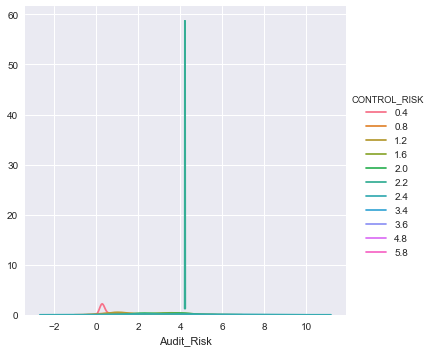

<Figure size 432x288 with 0 Axes>

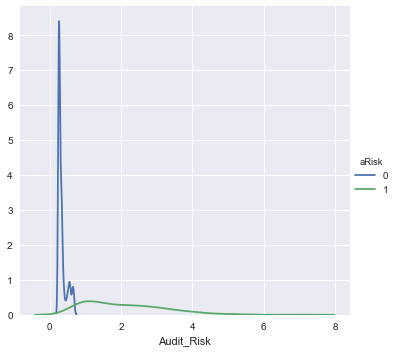

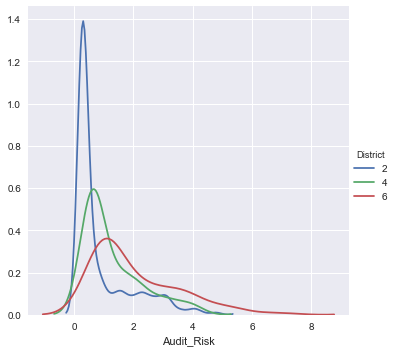

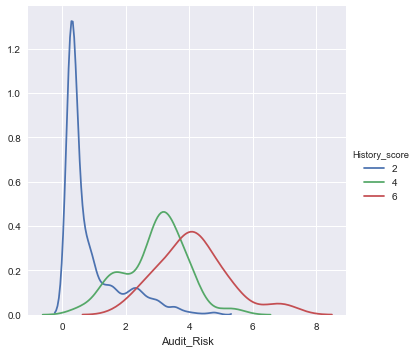

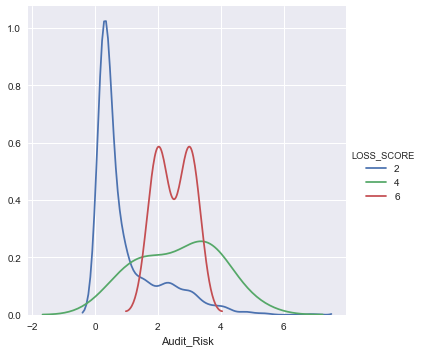

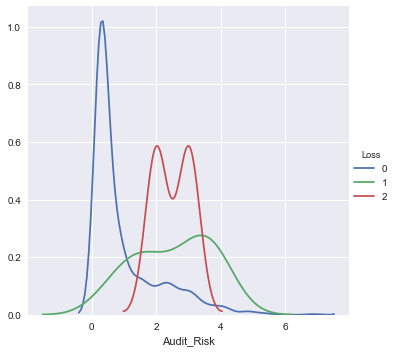

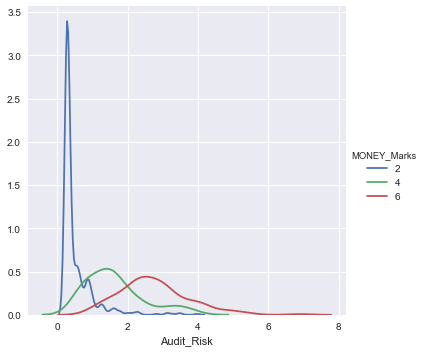

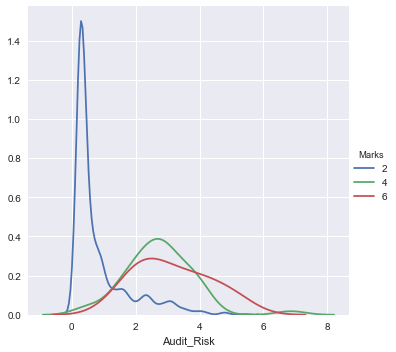

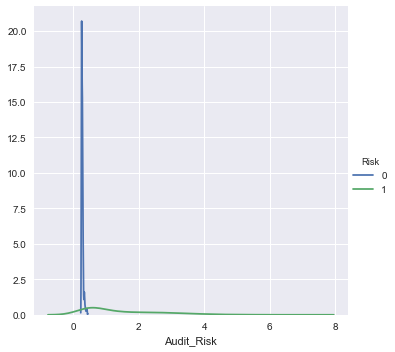

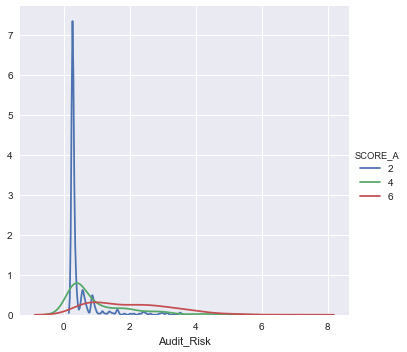

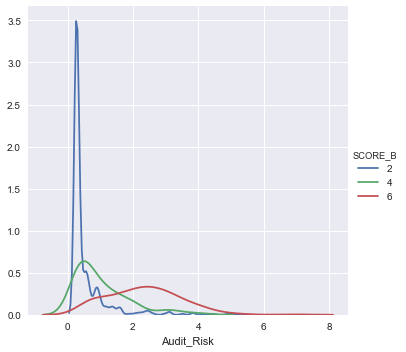

In [61]:
df1 = df
df1.Audit_Risk = np.log1p(df1.Audit_Risk)

for i, col in enumerate(df1.columns):    
    if len(np.unique(df1[col])) <20:
        #print(col,len(np.unique(df[col])))
        plt.figure(i)
        sns.FacetGrid(df1, hue=col,size=5).map(sns.kdeplot, 'Audit_Risk').add_legend()
    #sns.countplot(x=col, data=df1)

In [59]:
list(df1)

['Sector_score',
 'PARA_A',
 'Score_A',
 'Risk_A',
 'PARA_B',
 'Score_B',
 'Risk_B',
 'TOTAL',
 'numbers',
 'Score_B.1',
 'Risk_C',
 'Money_Value',
 'Score_MV',
 'Risk_D',
 'PROB',
 'RiSk_E',
 'Prob',
 'Risk_F',
 'Score',
 'Inherent_Risk',
 'CONTROL_RISK',
 'Audit_Risk']

In [51]:
a=df[["LOCATION_ID","Risk"]].groupby("LOCATION_ID").mean().sort_values(by="Risk", ascending=False)
print(a)

                 Risk
LOCATION_ID          
23           1.000000
42           1.000000
35           1.000000
34           1.000000
33           1.000000
41           1.000000
24           1.000000
20           1.000000
38           1.000000
44           1.000000
1            0.909091
37           0.900000
39           0.888889
2            0.853659
30           0.750000
21           0.750000
8            0.750000
7            0.750000
32           0.724138
15           0.714286
22           0.708333
19           0.691176
16           0.673077
3            0.666667
40           0.666667
11           0.653846
28           0.625000
13           0.600000
31           0.583333
12           0.574468
18           0.562500
14           0.550000
4            0.513514
27           0.500000
9            0.490566
29           0.428571
5            0.386364
25           0.333333
6            0.333333
43           0.285714
36           0.250000
17           0.000000
LOHARU       0.000000
NUH       

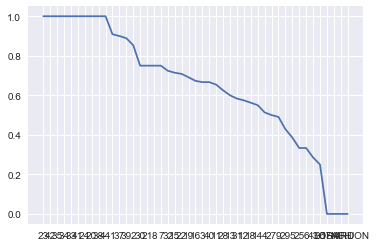

In [52]:
# Risk varies in some LOCATION_IDs
# Need transform location_id
plt.plot(a.index,a['Risk'])
plt.show()

In [56]:
a =[]
for i in df.LOCATION_ID:
    if i == 'SAFIDON':
        new_val = 101
    elif i == 'NUH':
        new_val = 102
    elif i == 'LOHARU':
        new_val = 1003
    else:
        new_val = int(i)
    a.append(new_val)
    #df.LOCATION_ID.replace(i,new_val)
df.LOCATION_ID = a

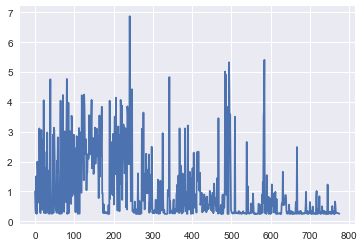

In [54]:
plt.plot(np.log1p(df.Audit_Risk))
#plt.plot(np.log(df.Audit_Risk))

plt.show()